from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
import numpy as np

columns_list = ['income', 'debt_to_income_ratio', 'applicant_credit_score_type', 'co-applicant_credit_score_type', 'loan_amount', 'loan_purpose', 'loan_to_value_ratio', 'loan_term', 'preapproval', 'lien_status', 'prepayment_penalty_term', 'intro_rate_period', 'negative_amortization', 'interest_only_payment', 'balloon_payment', 'property_value', 'construction_method', 'occupancy_type', 'county_code', 'census_tract', 'applicant_ethnicity-1', 'applicant_ethnicity-2', 'applicant_ethnicity-3', 'applicant_ethnicity-4', 'applicant_ethnicity-5', 'applicant_race-1', 'applicant_race-2', 'applicant_race-3', 'applicant_race-4', 'applicant_race-5', 'applicant_sex','applicant_age', 'action_taken']

#columns_list = ['loan_purpose', 'loan_amount', 'action_taken', 'applicant_ethnicity-1', 'applicant_ethnicity-2', 'applicant_ethnicity-3', 'applicant_ethnicity-4', 'applicant_ethnicity-5', 'applicant_race-1', 'applicant_race-2', 'applicant_race-3', 'applicant_race-4', 'applicant_race-5', 'applicant_sex', 'lien_status',


#  'income', 'debt_to_income_ratio', 'applicant_credit_score_type', 'co-applicant_credit_score_type', 'loan_amount', 'loan_type', 'loan_purpose', 'loan_to_value_ratio', 'interest_rate', 'rate_spread', 'loan_term', 'preapproval', 'lien_status', 'prepayment_penalty_term', 'intro_rate_period', 'negative_amortization', 'interest_only_payment', 'balloon_payment', 'property_value', 'construction_method', 'occupancy_type', 'county_code', 'census_tract', 'applicant_ethnicity-1', 'applicant_ethnicity-2', 'applicant_ethnicity-3', 'applicant_ethnicity-4', 'applicant_ethnicity-5', 'applicant_race-1', 'applicant_race-2', 'applicant_race-3', 'applicant_race-4', 'applicant_race-5', 'applicant_sex', 'action_taken']


int_types = ['applicant_ethnicity-1',
       'applicant_ethnicity-2', 'applicant_ethnicity-3',
       'applicant_ethnicity-4', 'applicant_ethnicity-5', 'applicant_race-1',
       'applicant_race-2', 'applicant_race-3', 'applicant_race-4',
       'applicant_race-5', 'applicant_sex', 'action_taken']
float_types=['loan_amount','loan_to_value_ratio', 'interest_rate', 'rate_spread', 'income', 'debt_to_income_ratio', 'loan_to_value_ratio']

object_types=[]

data = pd.read_csv("state_CA.csv", usecols= columns_list)



<ipython-input-2-9cb36043a649>:21: DtypeWarning: Columns (22,31,32,33,38,46,77) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/state_CA.csv", usecols= columns_list)


In [ ]:
len(columns_list)

33

In [ ]:
data.columns

Index(['county_code', 'census_tract', 'action_taken', 'preapproval',
       'loan_purpose', 'lien_status', 'loan_amount', 'loan_to_value_ratio',
       'loan_term', 'prepayment_penalty_term', 'intro_rate_period',
       'negative_amortization', 'interest_only_payment', 'balloon_payment',
       'property_value', 'construction_method', 'occupancy_type', 'income',
       'debt_to_income_ratio', 'applicant_credit_score_type',
       'co-applicant_credit_score_type', 'applicant_ethnicity-1',
       'applicant_ethnicity-2', 'applicant_ethnicity-3',
       'applicant_ethnicity-4', 'applicant_ethnicity-5', 'applicant_race-1',
       'applicant_race-2', 'applicant_race-3', 'applicant_race-4',
       'applicant_race-5', 'applicant_sex', 'applicant_age'],
      dtype='object')

In [ ]:
columns_to_check_for_na = ['county_code', 'census_tract', 'preapproval',
       'loan_purpose', 'lien_status', 'loan_amount', 'loan_to_value_ratio', 'loan_term', 'prepayment_penalty_term',
       'intro_rate_period', 'negative_amortization', 'interest_only_payment',
       'balloon_payment', 'property_value', 'construction_method',
       'occupancy_type', 'income', 'debt_to_income_ratio',
       'applicant_credit_score_type', 'co-applicant_credit_score_type',
       'applicant_ethnicity-1', 'applicant_race-1', 'applicant_sex']

data= data.dropna(subset=columns_to_check_for_na)


In [ ]:
data = data[data!= 'Exempt']
data = data[data!= '1111']
data = data[data!= 1111]
data = data[data!= '8888']
data = data[data!= 8888]

In [ ]:
data = data[data!= 'NaN']
data = data[data!= 'nan']

In [ ]:
# Update action_taken values
data['action_taken'] = data['action_taken'].replace({1: 1, 2: 1, 3: 0, 7: 0})

# Drop rows with action_taken values of 4, 5, 6, or 8
data = data[~data['action_taken'].isin([4, 5, 6, 8])]
data = data[~data['applicant_ethnicity-1'].isin([3, 4])]
data = data[~data['applicant_sex'].isin([3, 4, 6])]



In [ ]:
action_taken_counts = data['action_taken'].value_counts()
print(action_taken_counts)

action_taken
0    32992
1    31881
Name: count, dtype: int64


In [ ]:
data['debt_to_income_ratio']= data['debt_to_income_ratio'].replace({
    '<20%': '0',
    '>60%': '60',

    '30%-<36%': '30',
    '20%-<30%': '20',
    '50%-60%': '50'
})

num_elements_per_range = min(data['debt_to_income_ratio'].value_counts())



In [ ]:

replacement_ranges = {
    '37': [37,38,39,40,41,42],
    '43': [43,44,45,46,47,48,49],
}

for key,value in replacement_ranges.items():
  selected_rows= data['debt_to_income_ratio'].astype(float).between(min(value), max(value))
  data.loc[selected_rows, 'debt_to_income_ratio'] = key



In [ ]:
for i in range(1, 6):
        race_col = f'applicant_race-{i}'
        data[race_col] = data[race_col].replace({1: 1, 2: 2, 21:2, 22:2, 23:2, 24:2, 25:2, 26:2, 27:2, 3: 3, 4: 4, 41:4, 42: 4, 43: 4, 44: 4})

for i in range(1, 6):
        race_col = f'applicant_ethnicity-{i}'
        data[race_col] = data[race_col].replace({1: 1, 2: 0, 11:1, 12:1, 13:1, 14:1})

data['applicant_ethnicity'] = (data[['applicant_ethnicity-1', 'applicant_ethnicity-2', 'applicant_ethnicity-3', 'applicant_ethnicity-4', 'applicant_ethnicity-5']].sum(axis=1) >= 1).astype(int) + 1
data.drop(['applicant_ethnicity-1', 'applicant_ethnicity-2', 'applicant_ethnicity-3', 'applicant_ethnicity-4', 'applicant_ethnicity-5'],  axis=1, inplace=True)


In [ ]:
data

,county_code,census_tract,action_taken,preapproval,loan_purpose,lien_status,loan_amount,loan_to_value_ratio,loan_term,prepayment_penalty_term,...,applicant_credit_score_type,co-applicant_credit_score_type,applicant_race-1,applicant_race-2,applicant_race-3,applicant_race-4,applicant_race-5,applicant_sex,applicant_age,applicant_ethnicity
54108,6085.0,6.085504e+09,1,2,1,1,1085000.0,NaN,NaN,NaN,...,NaN,NaN,2.0,2.0,NaN,NaN,NaN,1,35-44,1
54116,6059.0,6.059063e+09,1,2,1,1,1955000.0,NaN,NaN,NaN,...,NaN,NaN,5.0,NaN,NaN,NaN,NaN,2,35-44,1
54131,6037.0,6.037262e+09,1,2,1,1,3045000.0,NaN,NaN,NaN,...,NaN,NaN,5.0,NaN,NaN,NaN,NaN,1,NaN,1
54139,6059.0,6.059063e+09,1,2,1,1,2625000.0,NaN,NaN,NaN,...,NaN,NaN,5.0,NaN,NaN,NaN,NaN,1,NaN,1
64997,6085.0,6.085508e+09,1,2,1,1,1725000.0,65.0,360.0,18.0,...,9.0,10.0,2.0,NaN,NaN,NaN,NaN,1,45-54,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1547658,6071.0,6.071002e+09,1,2,1,1,395000.0,NaN,NaN,NaN,...,NaN,NaN,2.0,2.0,NaN,NaN,NaN,1,25-34,1
1547660,6059.0,6.059052e+09,1,2,1,1,1025000.0,NaN,NaN,NaN,...,NaN,NaN,2.0,2.0,NaN,NaN,NaN,2,25-34,1
1547661,6037.0,6.037403e+09,1,2,1,1,545000.0,NaN,NaN,NaN,...,NaN,NaN,2.0,2.0,NaN,NaN,NaN,1,25-34,1
1547662,6037.0,6.037431e+09,1,2,32,1,875000.0,NaN,NaN,NaN,...,NaN,NaN,2.0,2.0,NaN,NaN,NaN,2,45-54,1


In [ ]:
def combine_race(row):
    races = []
    for i in range(1, 6):
        race_col = f'applicant_race-{i}'
        if pd.notna(row[race_col]) and row[race_col] in [1,2,3,4,5]:
            races.append(row[race_col])
    return races


In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer

app_race = data.apply(combine_race, axis=1)
mlb = MultiLabelBinarizer()
race_binarized = mlb.fit_transform(app_race)
data=data.drop(columns=['applicant_race-1', 'applicant_race-2', 'applicant_race-3', 'applicant_race-4', 'applicant_race-5'])

In [ ]:
data.columns

Index(['county_code', 'census_tract', 'action_taken', 'preapproval',
       'loan_purpose', 'lien_status', 'loan_amount', 'loan_to_value_ratio',
       'loan_term', 'prepayment_penalty_term', 'intro_rate_period',
       'negative_amortization', 'interest_only_payment', 'balloon_payment',
       'property_value', 'construction_method', 'occupancy_type', 'income',
       'debt_to_income_ratio', 'applicant_credit_score_type',
       'co-applicant_credit_score_type', 'applicant_sex', 'applicant_age',
       'applicant_ethnicity'],
      dtype='object')

In [ ]:
race_binarized

array([[0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       ...,
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0]])

In [ ]:
import numpy as np
race_sums = race_binarized.sum(axis=1)

data = data[race_sums > 0]
race_binarized = race_binarized[race_sums > 0]

In [ ]:
data['race'] = np.where(np.any(race_binarized[:,:4], axis=1),1,0)

In [ ]:
data.dropna(inplace=True)

In [ ]:
data['prepayment_penalty_term'] = data['prepayment_penalty_term'].astype(int)
data['intro_rate_period'] = data['intro_rate_period'].astype(int)

In [ ]:
x = 0
for column in data.columns:
  distinct_values = data[column].nunique()
  print(f"Column '{column}' has {distinct_values} distinct values", x)
  x+=1

Column 'county_code' has 57 distinct values 0
Column 'census_tract' has 8063 distinct values 1
Column 'action_taken' has 2 distinct values 2
Column 'preapproval' has 2 distinct values 3
Column 'loan_purpose' has 6 distinct values 4
Column 'lien_status' has 2 distinct values 5
Column 'loan_amount' has 186 distinct values 6
Column 'loan_to_value_ratio' has 26126 distinct values 7
Column 'loan_term' has 13 distinct values 8
Column 'prepayment_penalty_term' has 11 distinct values 9
Column 'intro_rate_period' has 15 distinct values 10
Column 'negative_amortization' has 2 distinct values 11
Column 'interest_only_payment' has 2 distinct values 12
Column 'balloon_payment' has 2 distinct values 13
Column 'property_value' has 1058 distinct values 14
Column 'construction_method' has 2 distinct values 15
Column 'occupancy_type' has 3 distinct values 16
Column 'income' has 1343 distinct values 17
Column 'debt_to_income_ratio' has 8 distinct values 18
Column 'applicant_credit_score_type' has 8 disti

In [ ]:
categorical_features = []
dicts = {}
x = 0
for column in data.columns:
  feature_dict= {}
  distinct_values = data[column].nunique()
  if column == 'action_taken' or column == 'Asian' or column == 'Black or AA' or column == 'NH or PI' or column == 'White':
    continue
  if column == 'AI or AN':
    feature_dict['AI or AN'] = x
    x+=1
    feature_dict['Asian'] = x
    x+=1
    feature_dict['Black or AA'] = x
    x+=1
    feature_dict['NH or PI'] = x
    x+=1
    feature_dict['White'] = x
    x+=1
    dicts['race'] = feature_dict
    continue
  elif distinct_values < 50 and distinct_values>2:
    categorical_features.append(column)
    distinct_ops = data[column].unique()
    for y in distinct_ops:
      feature_dict[y] = x
      print(f"Column '{column}' has {y} distinct values", x)
      x+=1
  elif distinct_values == 2:
    feature_dict['binary'] = x
    print(f"Column '{column}' has BINARY distinct values", x)
    x+=1
  else:
    feature_dict['continuous'] = x
    print(f"Column '{column}' has CONTINUOUS distinct values", x)
    x+=1
  dicts[column]=feature_dict

Column 'county_code' has CONTINUOUS distinct values 0
Column 'census_tract' has CONTINUOUS distinct values 1
Column 'preapproval' has BINARY distinct values 2
Column 'loan_purpose' has 1 distinct values 3
Column 'loan_purpose' has 31 distinct values 4
Column 'loan_purpose' has 2 distinct values 5
Column 'loan_purpose' has 32 distinct values 6
Column 'loan_purpose' has 4 distinct values 7
Column 'loan_purpose' has 5 distinct values 8
Column 'lien_status' has BINARY distinct values 9
Column 'loan_amount' has CONTINUOUS distinct values 10
Column 'loan_to_value_ratio' has CONTINUOUS distinct values 11
Column 'loan_term' has 360.0 distinct values 12
Column 'loan_term' has 240.0 distinct values 13
Column 'loan_term' has 360 distinct values 14
Column 'loan_term' has 240 distinct values 15
Column 'loan_term' has 300 distinct values 16
Column 'loan_term' has 180 distinct values 17
Column 'loan_term' has 180.0 distinct values 18
Column 'loan_term' has 300.0 distinct values 19
Column 'loan_term' 

In [ ]:
print(dicts)

{'county_code': {'continuous': 0}, 'census_tract': {'continuous': 1}, 'preapproval': {'binary': 2}, 'loan_purpose': {1: 3, 31: 4, 2: 5, 32: 6, 4: 7, 5: 8}, 'lien_status': {'binary': 9}, 'loan_amount': {'continuous': 10}, 'loan_to_value_ratio': {'continuous': 11}, 'loan_term': {360.0: 12, 240.0: 13, '360': 14, '240': 15, '300': 16, '180': 17, 180.0: 18, 300.0: 19, '60': 20, '120': 21, '480': 22, '84': 23, '420': 24}, 'prepayment_penalty_term': {18.0: 25, 36.0: 26, '36': 27, '0': 28, '24': 29, '12': 30, 24.0: 31, 12.0: 32, '6': 33, '2': 34, 2: 35}, 'intro_rate_period': {60.0: 36, 1.0: 37, '1': 38, '84': 39, '60': 40, '299': 41, '120': 42, '3': 43, 84.0: 44, '12': 45, '6': 46, 12.0: 47, 6.0: 48, 120.0: 49, 9.0: 50}, 'negative_amortization': {'binary': 51}, 'interest_only_payment': {'binary': 52}, 'balloon_payment': {'binary': 53}, 'property_value': {'continuous': 54}, 'construction_method': {'binary': 55}, 'occupancy_type': {3: 56, 1: 57, 2: 58}, 'income': {'continuous': 59}, 'debt_to_inc

In [ ]:
import pickle
file_path = '/content/drive/MyDrive/headers_dict.pickle'

with open(file_path, 'wb') as file:  # The 'wb' argument denotes write-binary mode
    pickle.dump(dicts, file)

print(f"Dictionary saved to {file_path}")

Dictionary saved to /content/drive/MyDrive/headers_dict.pickle


In [ ]:
# = ['occupancy_type', 'preapproval','lien_status', 'balloon_payment', 'negative_amortization', 'interest_only_payment', 'debt_to_income_ratio','applicant_age', 'loan_purpose', 'applicant_credit_score_type', 'co-applicant_credit_score_type']

data_encoded = pd.get_dummies(data, columns=categorical_features)

In [ ]:
data = data_encoded

In [ ]:
data.columns

Index(['county_code', 'census_tract', 'action_taken', 'preapproval',
       'lien_status', 'loan_amount', 'loan_to_value_ratio',
       'negative_amortization', 'interest_only_payment', 'balloon_payment',
       'property_value', 'construction_method', 'income', 'applicant_sex',
       'applicant_ethnicity', 'race', 'loan_purpose_1', 'loan_purpose_2',
       'loan_purpose_4', 'loan_purpose_5', 'loan_purpose_31',
       'loan_purpose_32', 'loan_term_180.0', 'loan_term_240.0',
       'loan_term_300.0', 'loan_term_360.0', 'loan_term_120', 'loan_term_180',
       'loan_term_240', 'loan_term_300', 'loan_term_360', 'loan_term_420',
       'loan_term_480', 'loan_term_60', 'loan_term_84',
       'prepayment_penalty_term_2', 'prepayment_penalty_term_12.0',
       'prepayment_penalty_term_18.0', 'prepayment_penalty_term_24.0',
       'prepayment_penalty_term_36.0', 'prepayment_penalty_term_0',
       'prepayment_penalty_term_12', 'prepayment_penalty_term_2',
       'prepayment_penalty_term_24', 

In [ ]:

# Separate the majority and minority classes
df_majority = data[data.action_taken == 0]
df_minority = data[data.action_taken == 1]

# Undersample the majority class without replacement
df_majority_undersampled = df_majority.sample(n=len(df_minority), random_state=42)

# Combine minority class with undersampled majority class
df_undersampled = pd.concat([df_minority, df_majority_undersampled])

# Shuffle the dataset to prevent the model from learning any order
df_undersampled = df_undersampled.sample(frac=1, random_state=42).reset_index(drop=True)


In [ ]:
 data = df_undersampled

In [ ]:
action_taken_counts = data['action_taken'].value_counts()
print(action_taken_counts)

action_taken
1    26720
0    26720
Name: count, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split

# Assuming 'action_taken' is the target variable


columns_with_na = data.columns[data.isna().any()].tolist()
X = data.drop('action_taken', axis=1)
y = data['action_taken']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
columns_with_na

[]

In [ ]:
features = X.to_numpy()
print(features.shape)
np.save('/content/drive/MyDrive/features.npy', features)

(53440, 95)


In [ ]:
labels = y.to_numpy()
np.save('/content/drive/MyDrive/labels.npy', labels)

In [ ]:
column_names = X.columns.tolist()
column_names_array = np.array(column_names)
np.save('/content/drive/MyDrive/headers_list.npy', column_names_array)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, classification_report

# Create a pipeline with preprocessing and model
logistic_model = make_pipeline(StandardScaler(), LogisticRegression(max_iter=3000))

# Fit the model on the training data
logistic_model.fit(X_train, y_train)

# Predict on the test data
y_pred = logistic_model.predict(X_test)

# Calculate the accuracy
logistic_accuracy = accuracy_score(y_test, y_pred)
print(f'Logistic Regression Accuracy: {logistic_accuracy:.4f}')

# Generate and print the classification report
report = classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1'])

Logistic Regression Accuracy: 0.8016


In [ ]:
print(report)

              precision    recall  f1-score   support

     Class 0       0.84      0.74      0.79      5315
     Class 1       0.77      0.86      0.81      5373

    accuracy                           0.80     10688
   macro avg       0.81      0.80      0.80     10688
weighted avg       0.81      0.80      0.80     10688



In [ ]:
from sklearn.metrics import precision_score, f1_score, recall_score
print(precision_score(y_test, y_pred), f1_score(y_test, y_pred), recall_score(y_test, y_pred))

0.7717245989304813 0.8132429338733821 0.8594825981760655


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Predict on the test data
rf_pred = rf_model.predict(X_test)

# Calculate the accuracy
rf_accuracy = accuracy_score(y_test, rf_pred)
print(f'Random Forest Accuracy: {rf_accuracy}')

# Generate and print the classification report
rf_report = classification_report(y_test, rf_pred, target_names=['Class 0', 'Class 1'])
print(rf_report)

Random Forest Accuracy: 0.8307447604790419
              precision    recall  f1-score   support

     Class 0       0.86      0.79      0.82      5315
     Class 1       0.81      0.87      0.84      5373

    accuracy                           0.83     10688
   macro avg       0.83      0.83      0.83     10688
weighted avg       0.83      0.83      0.83     10688



In [ ]:
print(precision_score(y_test, rf_pred), f1_score(y_test, rf_pred), recall_score(y_test, rf_pred))

0.8089459084604715 0.8376267839511715 0.8684161548483157


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Create a pipeline with preprocessing and the MLP model
# StandardScaler is used to scale the data for better performance of the MLP
mlp_model = make_pipeline(StandardScaler(), MLPClassifier(max_iter=1000,random_state=42, solver='sgd'))


# Fit the model on the training data
mlp_model.fit(X_train, y_train)

# Predict on the test data
mlp_pred = mlp_model.predict(X_test)

# Calculate the accuracy
mlp_accuracy = accuracy_score(y_test, mlp_pred)
print(f'MLP Accuracy: {mlp_accuracy}')

# Generate and print the classification report
mlp_report = classification_report(y_test, mlp_pred, target_names=['Class 0', 'Class 1'])
print(mlp_report)


MLP Accuracy: 0.8222305389221557
              precision    recall  f1-score   support

     Class 0       0.85      0.78      0.81      5315
     Class 1       0.80      0.86      0.83      5373

    accuracy                           0.82     10688
   macro avg       0.82      0.82      0.82     10688
weighted avg       0.82      0.82      0.82     10688



In [ ]:
print(precision_score(y_test, mlp_pred), f1_score(y_test, mlp_pred), recall_score(y_test, mlp_pred))

0.8007968127490039 0.8295352592858424 0.8604131769960915


Logistic


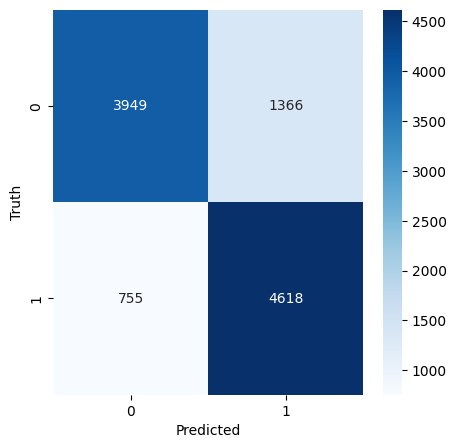


Random Forest


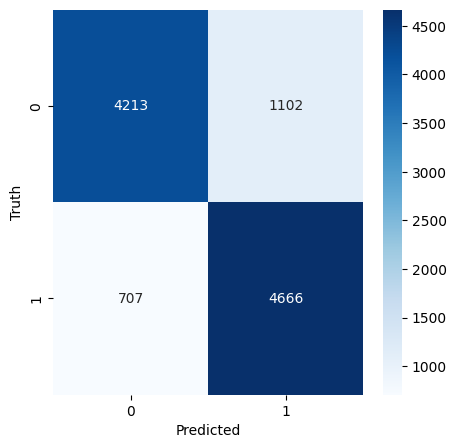


MLP


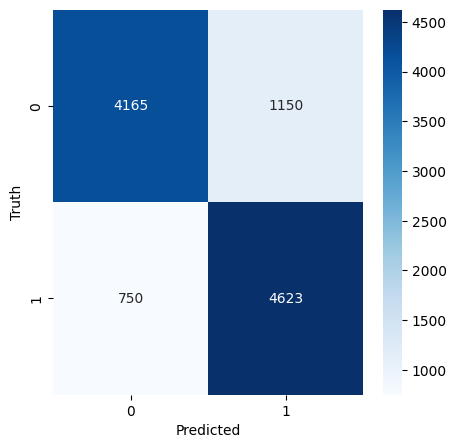

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


print("Logistic")
lg_cm = confusion_matrix(y_test, y_pred)

rf_cm =confusion_matrix(y_test, rf_pred)

mlp_cm = confusion_matrix(y_test, mlp_pred)

plt.figure(figsize=(5,5))
sns.heatmap(lg_cm, annot=True, fmt=".0f", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

print("\nRandom Forest")
plt.figure(figsize=(5,5))
sns.heatmap(rf_cm, annot=True, fmt=".0f", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

print("\nMLP")
plt.figure(figsize=(5,5))
sns.heatmap(mlp_cm, annot=True, fmt=".0f", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()